# 🔎 dFashion Data Profiling

Bevor man mit weiteren Datenanalyse startet, sollte man sich in jedem Fall einen Überblick über die Daten verschaffen.

Entweder können die Daten als Tabelle (z.B. aus einem S/4HANA) oder als analytisches Dataset bzw. Data Mart (BW/4HANA) bezeichnet. Für die gezielte Analyse bedarf es jedoch ein **statistisches Datenset**. Statistische Datensets sind meist kleiner als Tabellen oder analytische Datensets, da diese eine Standardverteilung anstreben, welche meist durch Verkaufsorganisationen, Vertriebswege oder Produktgruppen nicht gegeben ist.

![Datasets Übersicht](images/datasets_overview.png "Datasets Übersicht")

Folgende Schritte werden in diesem Dokument durchgeführt:

* Aufbau einer Verbindung gegen den SAP Datasphere Space buAAP und für die Verwendung verfügbar gemachten View PCS dFashion (VIEW_ZPCS_CP_02)
* Erstes statistisches Profiling und Intepretation der Ergebnisse
* Ableitung und Überprüfung eines statistischen Datensets für die weitere Analyse

## 🔗 Verbindung und statistisches Profiling

Für das Arbeiten in Python gegen eine SAP HANA bzw. SAP HANA Cloud (aus einem SAP Datasphere Space) verwenden wir die Python-Bilbiothek [**hana_ml**](https://help.sap.com/doc/cd94b08fe2e041c2ba778374572ddba9/2023_1_QRC/en-US/hana_ml.html), welche von SAP zur Verfügung gestellt wird. Diese Bibliothek erlaubt einen umfangreichen Zugriff auf die Daten und Algorithmen in der SAP HANA und integriert sich in die Python-Bilbiothek **pandas**.

Im ersten Schritt werden die Daten aus den Evnironment Variablen der Datei .env gelesen und für die Verbindung verwenden. Bei Fehlern in der Verbindung bitte noch einmal einen Blick in die README werfen, da SAP Datasphere ohne IP-Freigabe keinen beliebigen Zugriff erlaubt.

Anschließend wird direkt der SAP Datasphere View aufgerufen über ein Profiling in der SAP HANA abgefragt. Die Python-Bilbiothek hana_ml arbeitet mit "Remote Dataframes", vergleich aus anderen Bibliotheken wie zu Spark, und enthält eigene Funktionen und Methoden. Um Daten oder Ergebnisse lokal zu übertragen, um diese z.B. anzuzeigen, wird eine **.collect()** Methode ausgeführt. Über diese Methode werden die Daten abgerufen und man erhält ein Pandas Dataframe.

In [1]:
from json import load
dsp_buaap = load(open('../.env'))

import hana_ml.dataframe as dataframe
conn = dataframe.ConnectionContext(
    address=dsp_buaap['host'], 
    port=dsp_buaap['port'], 
    user=dsp_buaap['user'], 
    password=dsp_buaap['password'],
    encrypt = True, # must be set to True when connecting to HANA Cloud or SAP Datasphere
    sslValidateCertificate = True
    )

hdf_dfashion = conn.table('VIEW_ZPCS_CP_02', schema=dsp_buaap['schema'])

In [12]:
hdf_dfashion.describe().collect()

,column,count,unique,nulls,mean,std,min,max,median,25_percent_cont,25_percent_disc,50_percent_cont,50_percent_disc,75_percent_cont,75_percent_disc
0,0RECORDTP,2196947,1,0,0.000000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0
1,1ROWCOUNT,2196947,2,0,1.018362,0.000,1.0,2.0,1.0,1.0,1.0,1.0,1.0,1.00,1.0
2,ZEFGS,2196947,606510,0,24858.386174,86462.390,-9997790.7,10111435.8,2829.0,343.1,343.1,2829.0,2829.0,15602.55,15602.6
3,ZEFMARGIN,2196947,439261,0,8234.259014,172870.940,-115486166.5,115977039.1,1113.2,128.3,128.3,1113.2,1113.2,5819.60,5819.6
4,ZEFNS,2196947,524984,0,13665.572416,164908.710,-115250673.0,116259807.3,1803.5,219.5,219.5,1803.5,1803.5,9467.20,9467.2
5,ZEFPS,2196947,560925,0,18879.587106,65863.440,-4116755.5,4525574.9,2276.7,279.3,279.3,2276.7,2276.7,12315.75,12315.8
6,ZEFQUANT,2196947,113252,0,9904.043933,63555.309,-2907350.0,20543084.0,768.0,72.0,72.0,768.0,768.0,5184.00,5184.0
7,0CALDAY,2196947,2189,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,0CALDAY__0CALMONTH,2196947,72,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,0CALDAY__0CALMONTH2,2196947,12,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Das statistische Profil der Daten gibt bereits eine erste Indikation ob es sich zum Beispiel um ein statistische Datenset handelt (Nein).

* Kennzahlen enthalten statistische Werte wie Median, Perzentile, etc.
* Merkmale enthalten lediglich ein NaN

Obwohl das vorliegende analytische Datenset eine überschaubare Anzahl an Merkmalen und Kennzahlen hat, empfiehlt es sich erst einmal bei einem Minimum an Merkmalen zu bleiben und sich auf die Zielkennzahl zu konzentrieren.

> Je detaillierter Sie Ihre Daten machen, desto weniger aufschlussreich werden sie. 
> Das Hinzufügen von nur einem zusätzlichen Parameter zu einem Diagramm führt dazu, dass sich das Volumen des Diagramms exponentiell vergrößert, wodurch die enthaltenen Datenpunkte zerstreut und sinnvolle Zusammenhänge zwischen ihnen negiert werden.
> 
> - Curse of Dimensionality

Bei der Advanced Sales Analytics haben wir bereits eine Zielkennzahl **Umsatz (Netto)** (ZEFNS) definiert. Weitere Merkmale erkennt man bereits an technischen Bezeichnung. Andernfalls muss man in die SAP Datasphere und dessen beschreibenden Texte bzw. Datenkalog zur Hand nehmen, um mehr informationen über die Datenquelle zu bekommen.

### 💰 Umsatz (Netto) (ZEFNS)

* count / unique: 524.984 verschiedene Preise aus insgesamt 2.196.947 Zeilen; Die Häufigkeit in der Verteilung der Zielkennzahl wird nachfolgend noch interessant
* min / median / max: Die Verteilung der Zielkennzahl deutet bereits auf eine hohe Schiefe hin, da der Median wesentlich niedriger ist - im Gegensatz zum Min und Max. Das 25. und 75. Perzentil bestätigen dies. Minimum, Median, Maximum, sowie 25. Perzentil und 75. Perzentil kann man auch in einem Boxplot visualisieren.

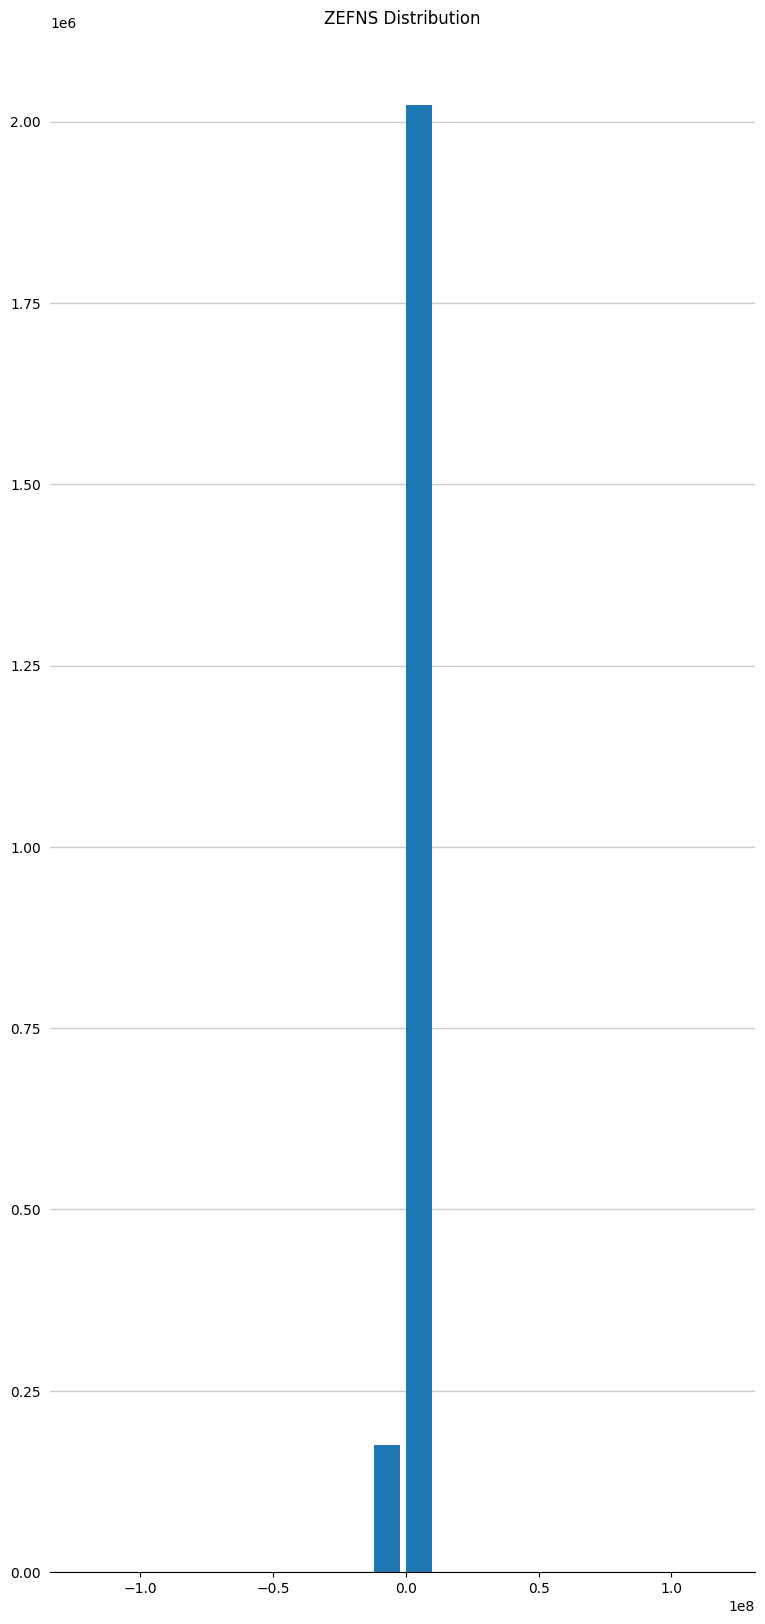

In [22]:
from hana_ml.visualizers.eda import hist
hdf_zefns = hdf_dfashion.cast('ZEFNS', 'INTEGER') # Only integer for histograms
hist(data=hdf_zefns, columns=['ZEFNS'], default_bins=20)

## 📊 Ableitung eines statistischen Datensets

Es gibt mehrere Methoden zu normalisieren oder zu transformieren bzw. Algorithmen zu wählen, welche ungleich verteilte Datensets ausgleichend berücksichtigen. Wir bedienen uns einer sehr simplen Methode: Filterung. Das heißt wir suchen innerhalb des analytischen Datensets ein statistischen Datenset als Ausschnitt durch Filter. Das setzt voraus, dass man Domänenwissen über die Daten hat und entsprechend durch gezielte Filterung und Überprüfung ein statistische Datenset ableiten können.

Ziel ist es anhand der ein Normalverteilung, Gleichverteiltung, etc. über der Zielkennzahl Umsatz (Netto) (ZEFNS) ein statistisches Datenset abzuleiten.

### 🏙️ Stadt (ZPCSSTAT), regionaler Filter

Wir wählen als kleinste regionale Entität die Stadt aus. Um die Auswahl zu erleichtern wählen wir eine Stadt, welche möglichst häufig im analytischen Datenset vertreten ist.

In [27]:
top_n = 10
hdf_dfashion_col_frequency = hdf_dfashion.agg([('count', 'ZPCSSTADT', 'COUNT')],  group_by = 'ZPCSSTADT')
df_col_frequency = hdf_dfashion_col_frequency.sort('COUNT', desc = True).head(top_n).collect()
df_col_frequency

,ZPCSSTADT,COUNT
0,Hamburg,79580
1,Mannheim,67689
2,Frankfurt am Main,61273
3,Wiesbaden,60588
4,Essen,57851
5,Dresden,56692
6,Münster,56573
7,Mainz,56219
8,Nürnberg,53199
9,Köln,52868


#### Hamburg

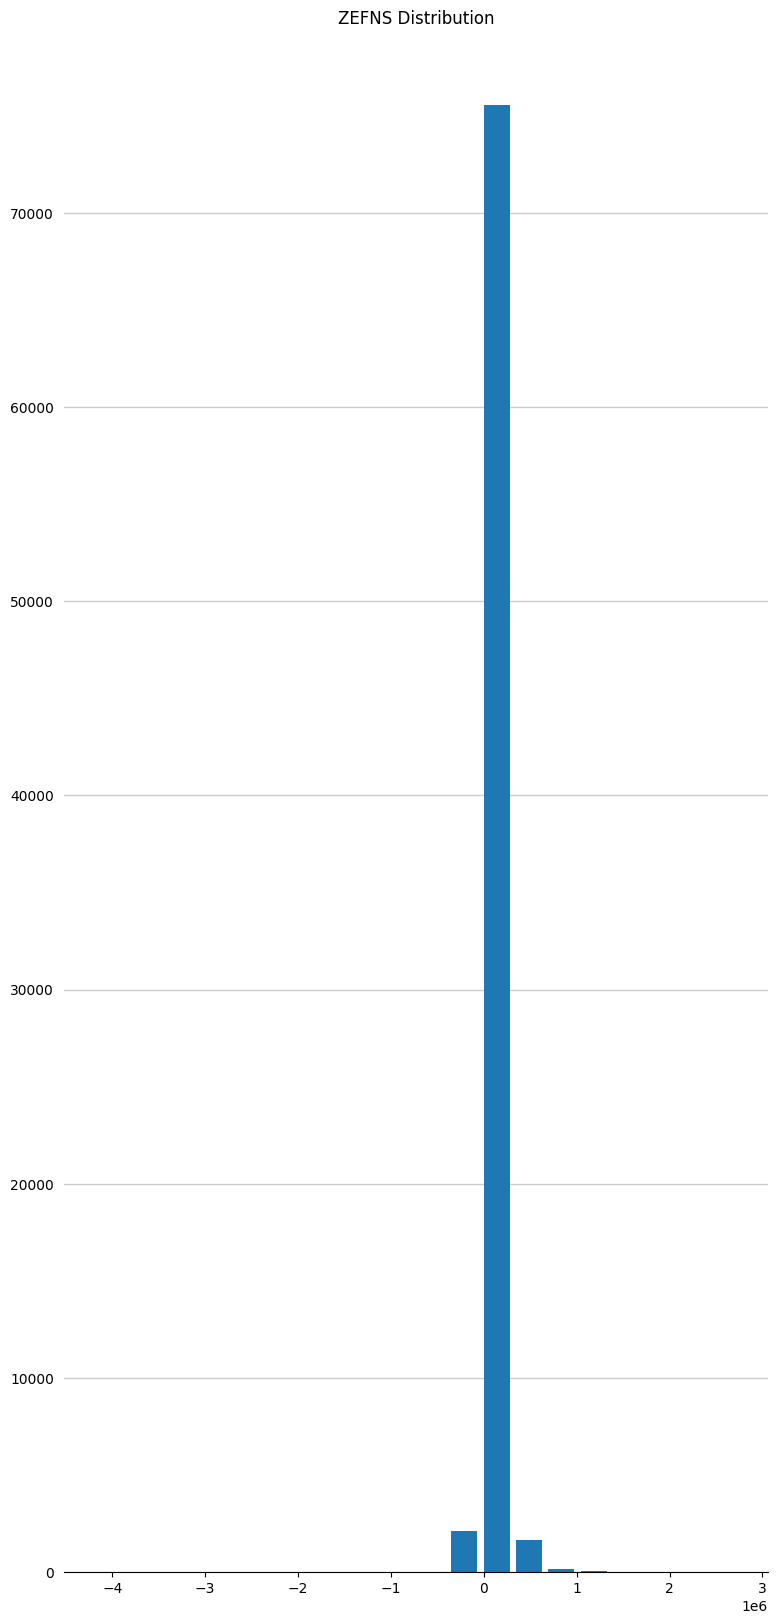

In [2]:
hdf_hamburg = hdf_dfashion.filter('ZPCSSTADT = \'Hamburg\'')

from hana_ml.visualizers.eda import hist
hdf_zefns = hdf_hamburg.cast('ZEFNS', 'INTEGER') # Only integer for histograms
hist(data=hdf_zefns, columns=['ZEFNS'], default_bins=20)

### ⌚ Kalendertag (0CALDAY), zeitlicher Filter

Ein weiterer, relevanter Faktor könnte die zeitliche Einteilung innerhalb des Datensets sein.

Daher schauen wir uns zunächst generell einmal den gesamten Zeitraum an.

#### Gesamtzeitraum

In [3]:
hdf_sales = hdf_hamburg.cast('ZEFNS', 'INTEGER')
hdf_sales_bydate = hdf_sales.agg([('sum', 'ZEFNS', 'ZEFNS_SUM')], group_by='0CALDAY')
df_sales_bydate = hdf_sales_bydate.collect()
hdf_sales_bydate.collect()

,0CALDAY,ZEFNS_SUM
0,20150102,4756789
1,20150105,4151645
2,20150106,2006966
3,20150107,3164307
4,20150108,2433101
...,...,...
1892,20201216,2792302
1893,20201217,2670698
1894,20201218,3316162
1895,20201219,52972


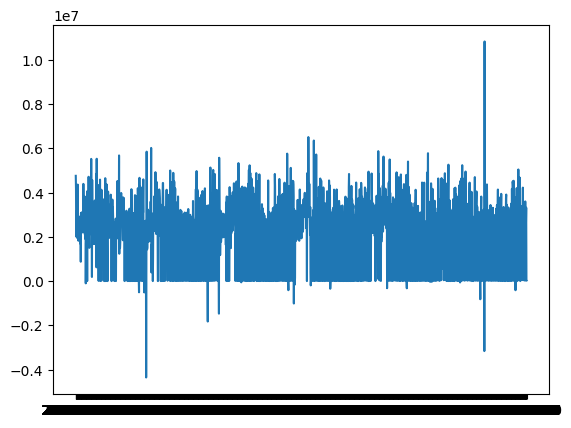

In [4]:
import matplotlib.pyplot as plt
plt.plot(df_sales_bydate['0CALDAY'], df_sales_bydate['ZEFNS_SUM'])
plt.rcParams['figure.figsize'] = [10, 8]
plt.show()

#### Meteorologische Sommer 2019

Die zeitliche Verteilung lässt weder eine Saisionalität oder Trend erkennen. Vielmehr sieht man immer noch extrem hohe Werte durchsetzt mit Extremwerten. Da wir zum Ziel haben den Einfluss des Wetters auf den Umsatz zu analysieren, nehmen wir als meteoroligische Saison den Sommer des Jahres 2019 (Vollständigkeit, daher nicht jeden Sommer eines Jahres). 

Eine weitere Annahme ist, dass im Gegensatz zu Frühlich, Herbst und Winter andere Faktoren auf den Umsatz wirken könnten als der Sommer.

Der meterologische Sommer beginnt in Deutschland am 1. Juni, offiziell endet er am 31. August. Daher wählen wir diesen Zeitraum.

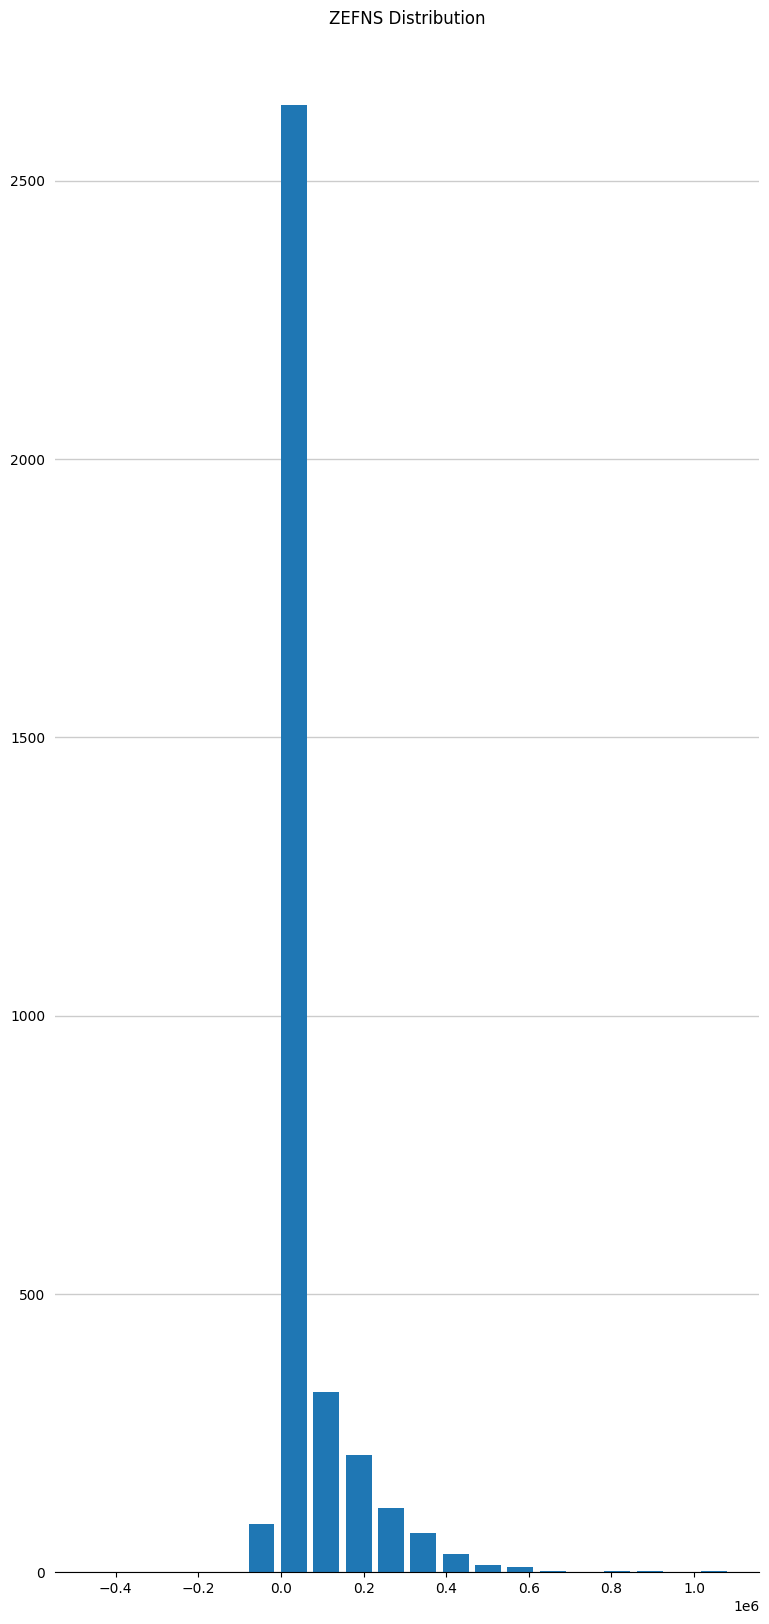

In [5]:
hdf_hamburg_s2019 = hdf_hamburg.filter('"0CALDAY" > \'20190601\' AND "0CALDAY" < \'20190831\'')

from hana_ml.visualizers.eda import hist
hdf_zefns = hdf_hamburg_s2019.cast('ZEFNS', 'INTEGER') # Only integer for histograms
hist(data=hdf_zefns, columns=['ZEFNS'], default_bins=20)

Insgesamt wir die Verteilung noch einmal besser. Allerdings häufen sich die Werte im ersten Binning nach Null, so dass wir uns auch noch einmal die zeitliche Verteilung anschauen können.

In [73]:
hdf_sales = hdf_hamburg_s2019.cast('ZEFNS', 'INTEGER')
hdf_sales_bydate = hdf_sales.agg([('sum', 'ZEFNS', 'ZEFNS_SUM')], group_by='0CALDAY')
df_sales_bydate = hdf_sales_bydate.collect()
hdf_sales_bydate.collect()

,0CALDAY,ZEFNS_SUM
0,20190812,560214
1,20190723,554937
2,20190711,568595
3,20190623,2699
4,20190715,603109
...,...,...
82,20190712,754814
83,20190716,649185
84,20190810,1591
85,20190622,4465


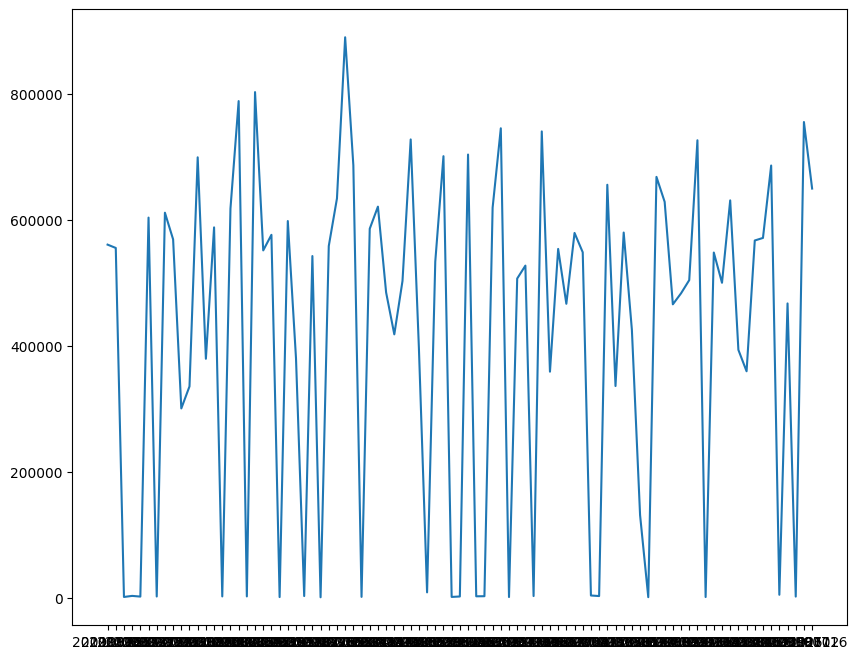

In [74]:
import matplotlib.pyplot as plt
plt.plot(df_sales_bydate['0CALDAY'], df_sales_bydate['ZEFNS_SUM'])
plt.rcParams['figure.figsize'] = [10, 8]
plt.show()

Im Gegensatz zum gesamten Zeitraum kann man etwas mehr erkennen. U.a. das **wiederkehrend eine Null oder nahe der Null** auftaucht. Wir können abschließend noch einmal Null Werte, also keinen Umsatz, ausschließen.

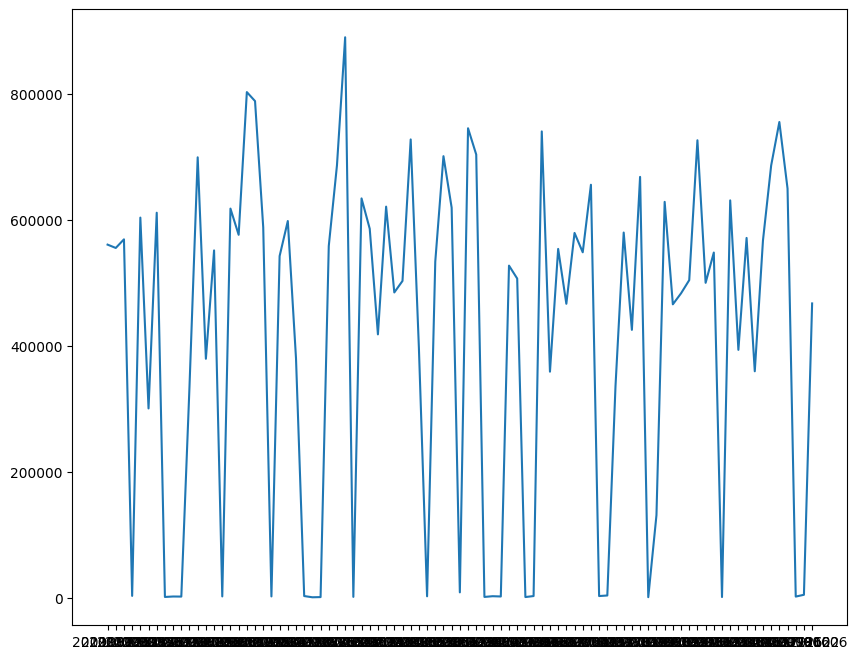

In [79]:
hdf_hamburg_s2019_filter = hdf_hamburg_s2019.filter('"ZEFNS" != 0')

hdf_sales = hdf_hamburg_s2019_filter.cast('ZEFNS', 'INTEGER')
hdf_sales_bydate = hdf_sales.agg([('sum', 'ZEFNS', 'ZEFNS_SUM')], group_by='0CALDAY')
df_sales_bydate = hdf_sales_bydate.collect()

import matplotlib.pyplot as plt
plt.plot(df_sales_bydate['0CALDAY'], df_sales_bydate['ZEFNS_SUM'])
plt.rcParams['figure.figsize'] = [10, 8]
plt.show()

## 💾 Statistisches Datenset

Wir stoppen an diesem Punkt und nehmen als statistisches Datenset Hamburg, Belts and Bags für den meteoroligschen Sommer 2019.

Da das Datenset nachfolgend immer noch Ausreißer enthält führen wir im nächsten Schritt eine Anomaly Detection durch.

In [71]:
from json import load
dsp_buaap = load(open('../.env'))

import hana_ml.dataframe as dataframe
conn = dataframe.ConnectionContext(
    address=dsp_buaap['host'], 
    port=dsp_buaap['port'], 
    user=dsp_buaap['user'], 
    password=dsp_buaap['password'],
    encrypt = True, # must be set to True when connecting to HANA Cloud or SAP Datasphere
    sslValidateCertificate = True
    )

hdf_dfashion = conn.table('VIEW_ZPCS_CP_02', schema=dsp_buaap['schema']).filter('"ZPCSSTADT" = \'Hamburg\' \
                                                                                AND "0CALDAY" > \'20190601\' AND "0CALDAY" < \'20190831\'')

In [72]:
hdf_dfashion.describe().collect()

,column,count,unique,nulls,mean,std,min,max,median,25_percent_cont,25_percent_disc,50_percent_cont,50_percent_disc,75_percent_cont,75_percent_disc
0,0RECORDTP,433,1,0,0.000000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1ROWCOUNT,433,1,0,1.000000,0.000,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0
2,ZEFGS,433,426,0,190936.526790,309572.750,-13514.7,1346512.8,29726.7,1512.1,1512.1,29726.7,29726.7,300604.5,300604.5
3,ZEFMARGIN,433,429,0,47611.363279,75380.460,-51837.9,329884.7,6264.6,792.8,792.8,6264.6,6264.6,92586.4,92586.4
4,ZEFNS,433,429,0,82922.792610,129071.710,-4046.7,563946.2,14290.1,1416.7,1416.7,14290.1,14290.1,143116.5,143116.5
5,ZEFPS,433,429,0,136330.663972,217725.680,-767.6,1041917.7,22926.3,1416.7,1416.7,22926.3,22926.3,225224.3,225224.3
6,ZEFQUANT,433,396,0,75992.057737,121337.679,1.0,548438.0,10794.0,635.0,635.0,10794.0,10794.0,93875.0,93875.0
7,0CALDAY,433,87,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,0CALDAY__0CALMONTH,433,3,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,0CALDAY__0CALMONTH2,433,3,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
